Implementing K-Means Clustering on Customer Segments
Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.



c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


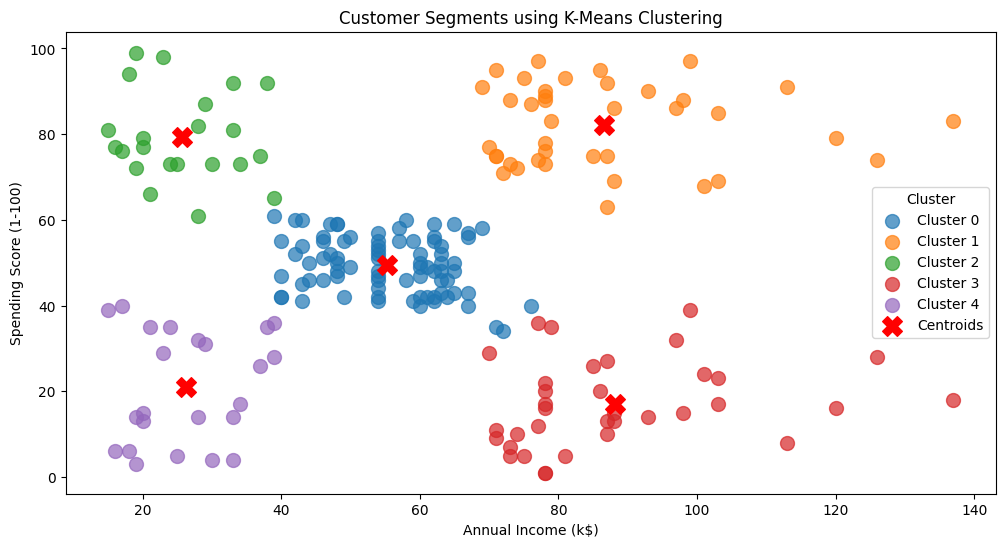

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaledX)

data['Cluster'] = clusters

plt.figure(figsize=(12, 6))

for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', s=100, alpha=0.7)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

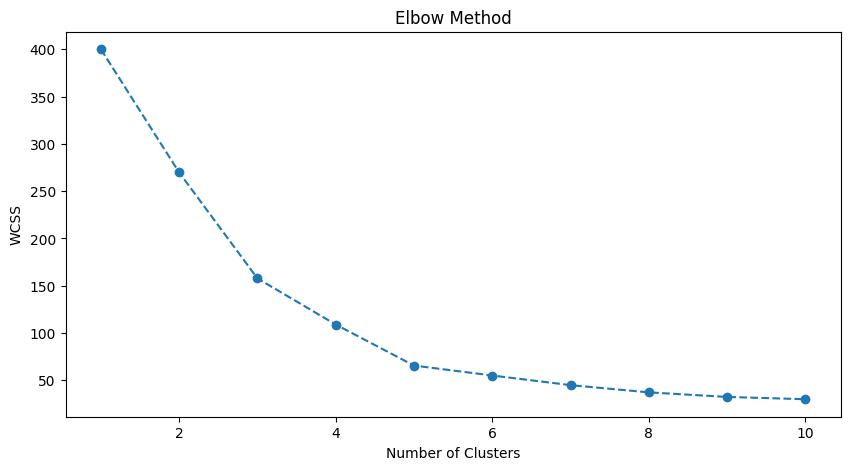

c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

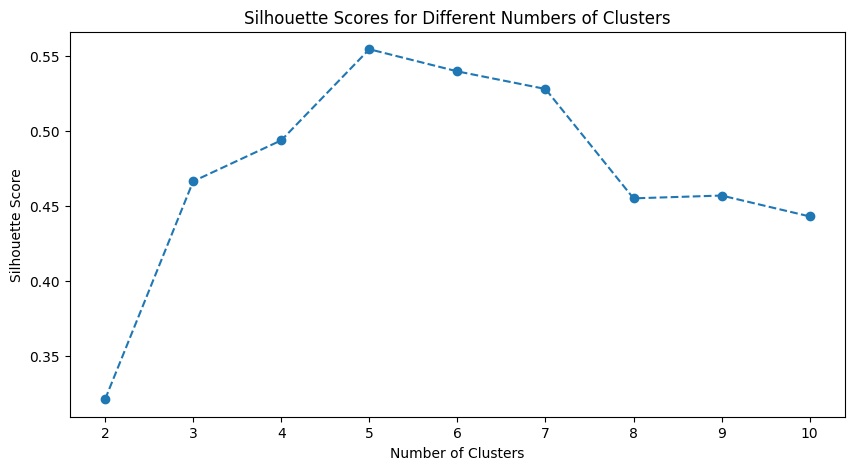

Optimal number of clusters based on silhouette score: 5


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaledX)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

silhouetteScores = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(scaledX)
    score = silhouette_score(scaledX, clusters)
    silhouetteScores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouetteScores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

bestNumClusters = np.argmax(silhouetteScores) + 2  
print(f'Optimal number of clusters based on silhouette score: {bestNumClusters}')


Cluster Profiling and Insights
Task: Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.



c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster  Annual Income (k$)  Spending Score (1-100)
0        0           55.296296               49.518519
1        1           86.538462               82.128205
2        2           25.727273               79.363636
3        3           88.200000               17.114286
4        4           26.304348               20.913043


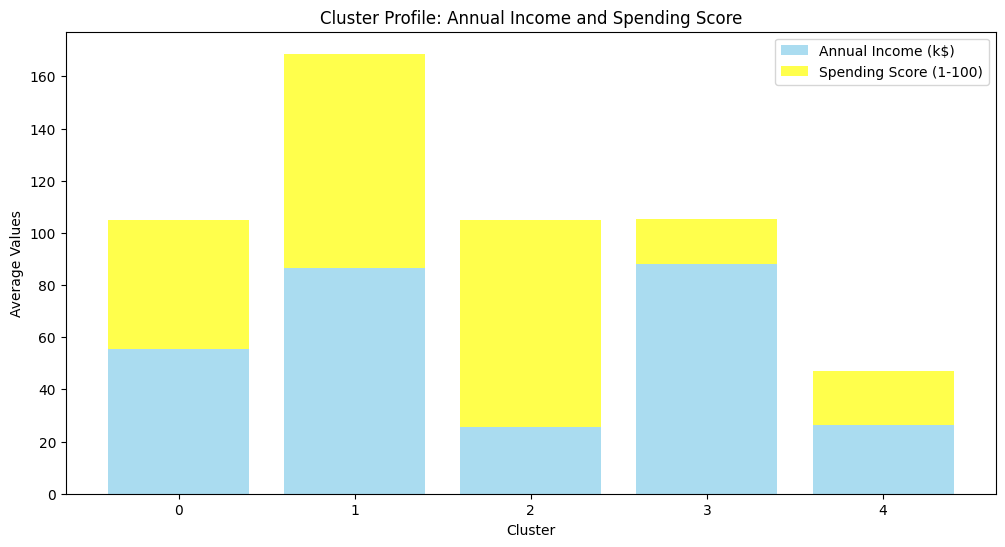

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaledX)

data['Cluster'] = clusters

cProfile = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

print(cProfile)

plt.figure(figsize=(12, 6))
plt.bar(cProfile['Cluster'], cProfile['Annual Income (k$)'], color='skyblue', alpha=0.7, label='Annual Income (k$)')
plt.bar(cProfile['Cluster'], cProfile['Spending Score (1-100)'], color='yellow', alpha=0.7, label='Spending Score (1-100)', bottom=cProfile['Annual Income (k$)'])
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.title('Cluster Profile: Annual Income and Spending Score')
plt.xticks(cProfile['Cluster'])
plt.legend()
plt.show()


Hierarchical Clustering for Customer Segmentation
Task: Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.



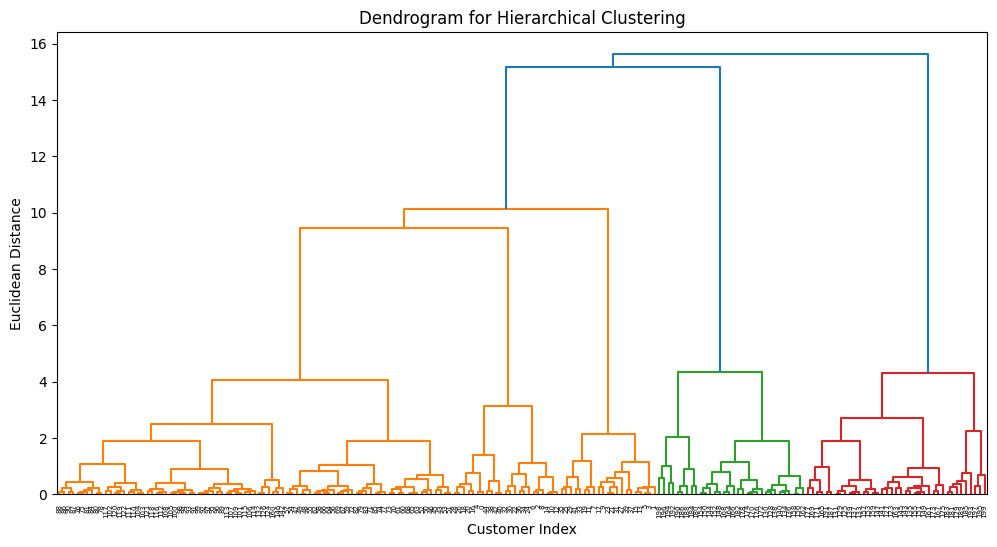

c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   KMeansCluster  HierarchicalCluster  Count
0              0                    5     81
1              1                    1     39
2              2                    3     21
3              2                    5      1
4              3                    2     32
5              3                    5      3
6              4                    4     23


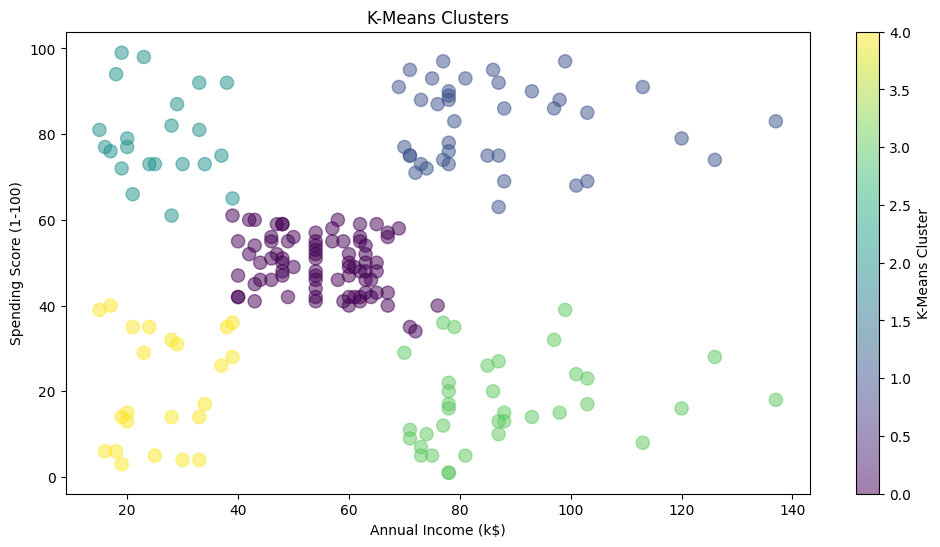

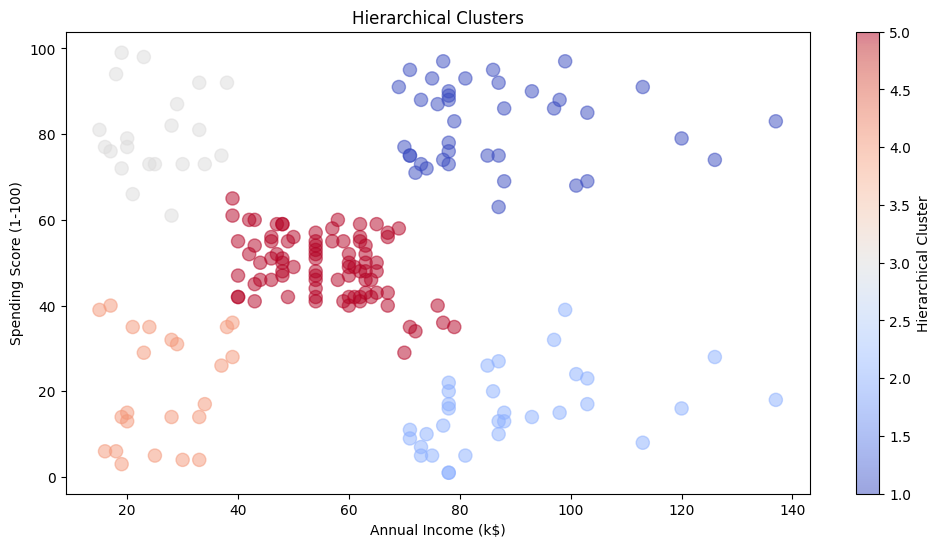

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()

num_clusters = 5
hierarchical_clusters = fcluster(linked, num_clusters, criterion='maxclust')
data['HierarchicalCluster'] = hierarchical_clusters


kmeans = KMeans(n_clusters=5, random_state=42)
kmeansClusters = kmeans.fit_predict(X_scaled)
data['KMeansCluster'] = kmeansClusters

comparison = data.groupby(['KMeansCluster', 'HierarchicalCluster']).size().reset_index(name='Count')
print(comparison)

plt.figure(figsize=(12, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeansCluster'], cmap='viridis', s=90, alpha=0.5)
plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='K-Means Cluster')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['HierarchicalCluster'], cmap='coolwarm', s=90, alpha=0.5)
plt.title('Hierarchical Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Hierarchical Cluster')
plt.show()


Visualizing Clusters with PCA
Task: Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


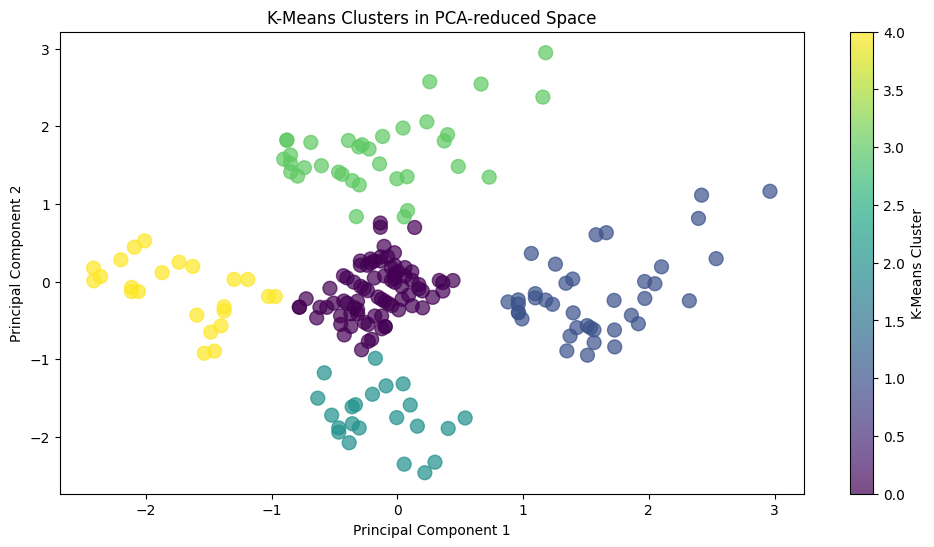

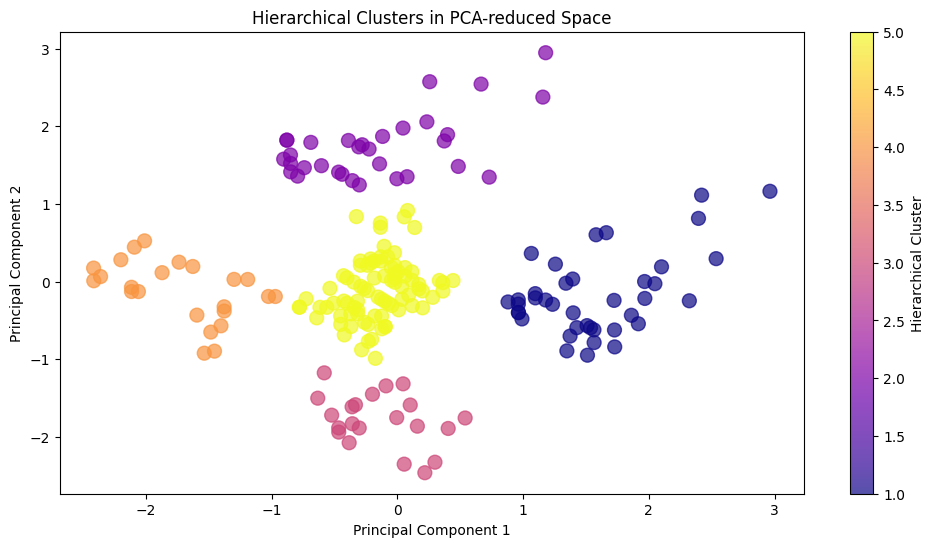

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
data['KMeansCluster'] = kmeans.fit_predict(scaledX)

linked = linkage(X_scaled, method='ward')
numClusters = 5
data['HierarchicalCluster'] = fcluster(linked, numClusters, criterion='maxclust')

pca = PCA(n_components=2)
pcaX = pca.fit_transform(X_scaled)

data['PCA1'] = pcaX[:, 0]
data['PCA2'] = pcaX[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['KMeansCluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='K-Means Cluster')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['HierarchicalCluster'], cmap='plasma', s=100, alpha=0.7)
plt.title('Hierarchical Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Hierarchical Cluster')
plt.show()
